<a href="https://colab.research.google.com/github/shuvrodas13/ML/blob/main/Breast%20Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A scientist is interested in exploring the variables of this dataset and building a machine-learning
model which accurately classifies tumors as Benign or Malignant based on the tumor shape and
its geometry. You can get data and data description in the following link https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic. Apply all classification
techniques that are known to you and suggest the best model for the classification. Write a
scientific report for that scientist after analyzing this data. Upload your report in the google
classroom on time. As a data scientist, try to find hidden information from the dataset and
mention some advice to your client if you have one.**

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score



In [62]:
# Download the dataset from the UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

column_names = [
    "ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter",
    "Mean Area", "Mean Smoothness", "Mean Compactness", "Mean Concavity",
    "Mean Concave Points", "Mean Symmetry", "Mean Fractal Dimension",
    "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE",
    "Compactness SE", "Concavity SE", "Concave Points SE", "Symmetry SE",
    "Fractal Dimension SE", "Worst Radius", "Worst Texture",
    "Worst Perimeter", "Worst Area", "Worst Smoothness",
    "Worst Compactness", "Worst Concavity", "Worst Concave Points",
    "Worst Symmetry", "Worst Fractal Dimension"
]

data = pd.read_csv(url, header=None, names=column_names)


# Data Set Information
The Breast Cancer Wisconsin (Diagnostic) dataset contains several features that are used to describe characteristics of cell nuclei present in breast cancer biopsies. Here's a breakdown of the features included in the dataset:

1. **ID**: Numeric ID assigned to each sample.
2. **Diagnosis**: The target variable indicating whether the tumor is malignant (M) or benign (B).
3. **Mean Radius**: Mean of distances from center to points on the perimeter.
4. **Mean Texture**: Standard deviation of gray-scale values.
5. **Mean Perimeter**: Mean size of the core tumor.
6. **Mean Area**: Mean area of the core tumor.
7. **Mean Smoothness**: Mean of local variation in radius lengths.
8. **Mean Compactness**: Mean of perimeter^2 / area - 1.0.
9. **Mean Concavity**: Mean severity of concave portions of the contour.
10. **Mean Concave Points**: Mean number of concave portions of the contour.
11. **Mean Symmetry**: Mean symmetry of cell nuclei.
12. **Mean Fractal Dimension**: Mean of "coastline approximation" - 1.
13. **Radius SE**: Standard error of the mean of distances from center to points on the perimeter.
14. **Texture SE**: Standard error of gray-scale values.
15. **Perimeter SE**: Standard error of size of the core tumor.
16. **Area SE**: Standard error of area of the core tumor.
17. **Smoothness SE**: Standard error of local variation in radius lengths.
18. **Compactness SE**: Standard error of perimeter^2 / area - 1.0.
19. **Concavity SE**: Standard error of severity of concave portions of the contour.
20. **Concave Points SE**: Standard error for number of concave portions of the contour.
21. **Symmetry SE**: Standard error for symmetry of cell nuclei.
22. **Fractal Dimension SE**: Standard error for "coastline approximation" - 1.
23. **Worst Radius**: Maximum of the mean distances from center to points on the perimeter.
24. **Worst Texture**: Maximum of the standard deviations of gray-scale values.
25. **Worst Perimeter**: Maximum of the mean sizes of the core tumor.
26. **Worst Area**: Maximum of the mean areas of the core tumor.
27. **Worst Smoothness**: Maximum of the mean values of local variation in radius lengths.
28. **Worst Compactness**: Maximum of the mean values of perimeter^2 / area - 1.0.
29. **Worst Concavity**: Maximum of the mean values of severity of concave portions of the contour.
30. **Worst Concave Points**: Maximum of the mean values for number of concave portions of the contour.
31. **Worst Symmetry**: Maximum of the mean values of symmetry of cell nuclei.
32. **Worst Fractal Dimension**: Maximum of the mean values for "coastline approximation" - 1.

So, in total, there are 30 feature columns in addition to the ID and Diagnosis columns, making a total of 32 columns in the dataset.

In [63]:
data.head(10)

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [64]:
# Display summary statistics
print(data.describe())

                 ID  Mean Radius  Mean Texture  Mean Perimeter    Mean Area  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave Points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [65]:
# Check the data types and non-null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Mean Radius              569 non-null    float64
 3   Mean Texture             569 non-null    float64
 4   Mean Perimeter           569 non-null    float64
 5   Mean Area                569 non-null    float64
 6   Mean Smoothness          569 non-null    float64
 7   Mean Compactness         569 non-null    float64
 8   Mean Concavity           569 non-null    float64
 9   Mean Concave Points      569 non-null    float64
 10  Mean Symmetry            569 non-null    float64
 11  Mean Fractal Dimension   569 non-null    float64
 12  Radius SE                569 non-null    float64
 13  Texture SE               569 non-null    float64
 14  Perimeter SE             5

# Data Visualization

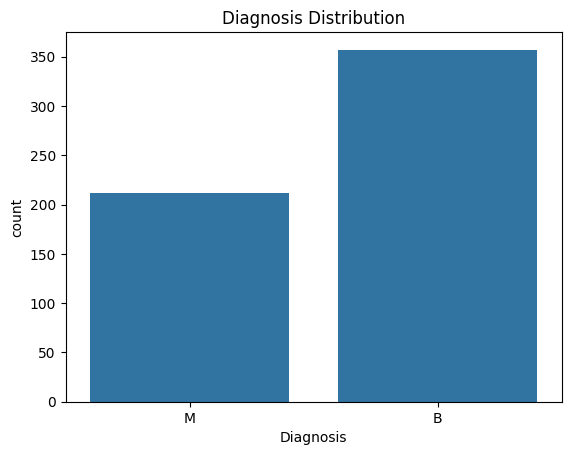

In [66]:
# Visualize the distribution of the target variable (Diagnosis)
sns.countplot(x='Diagnosis', data=data)
plt.title('Diagnosis Distribution')
plt.show()

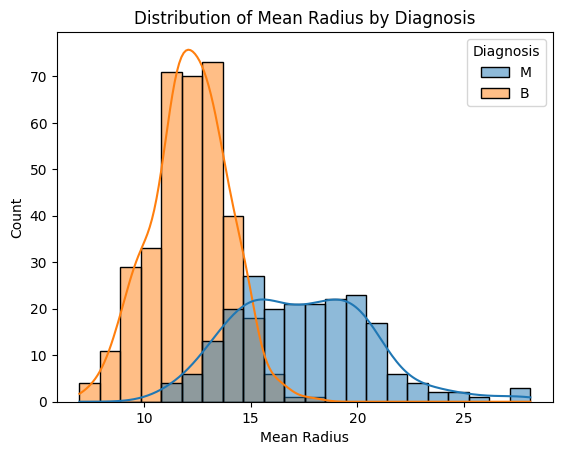

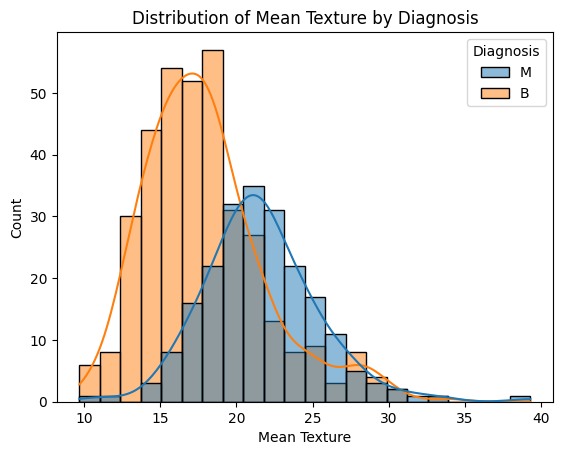

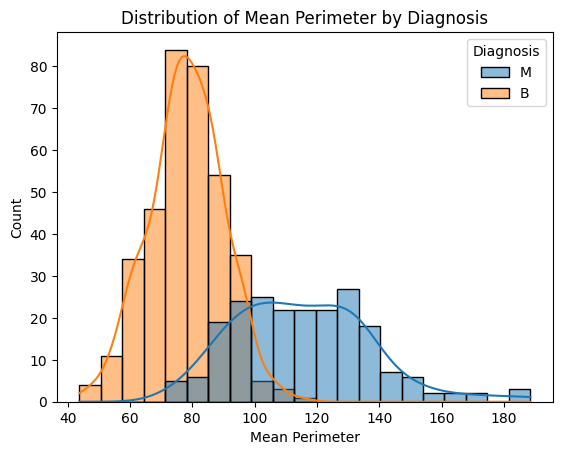

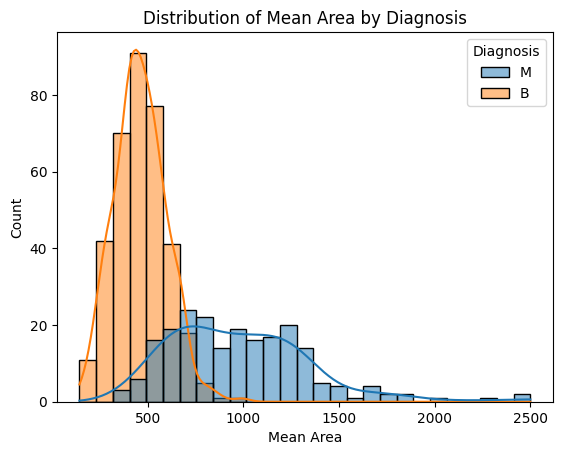

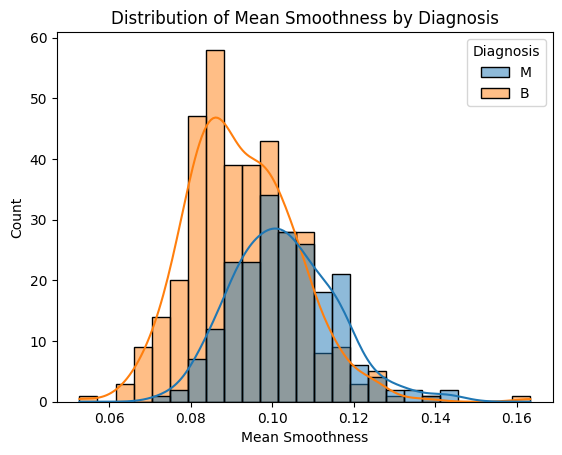

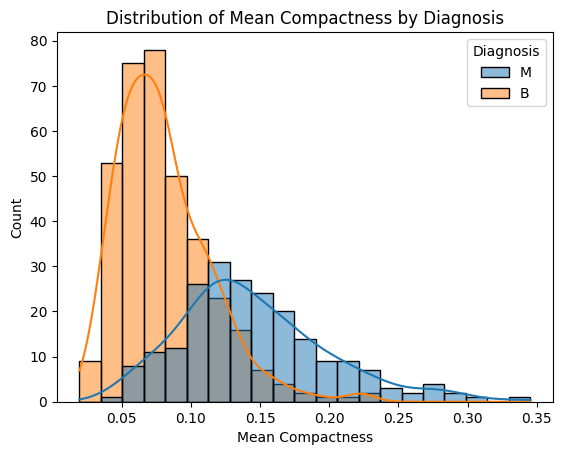

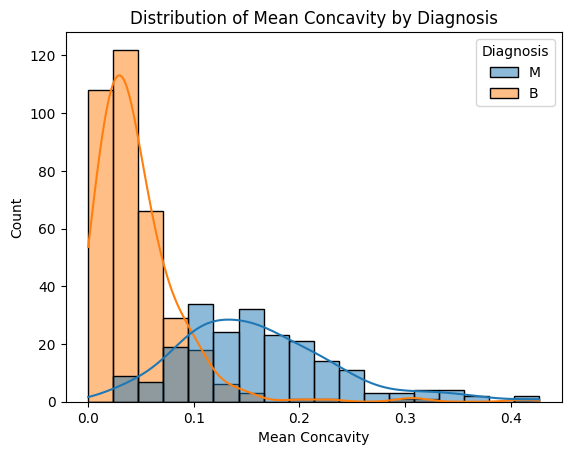

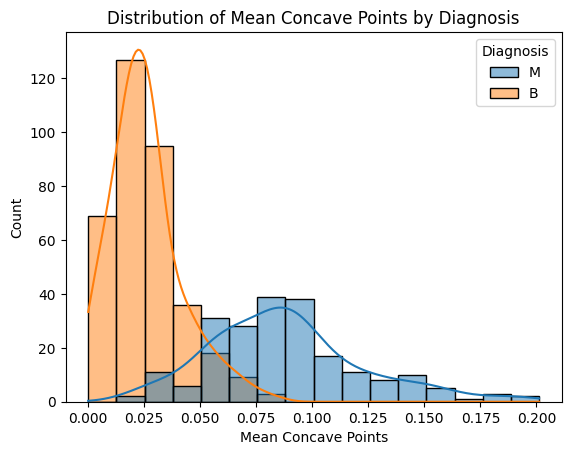

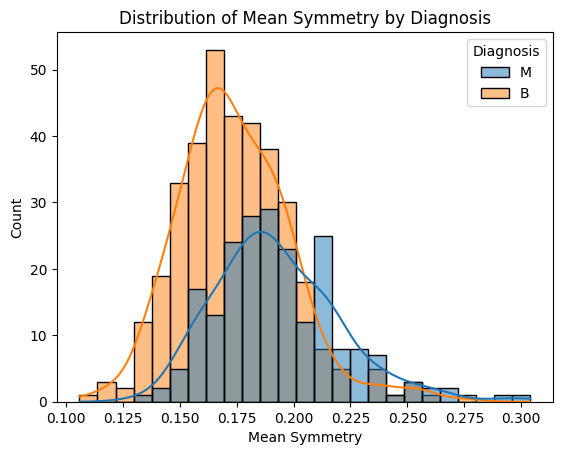

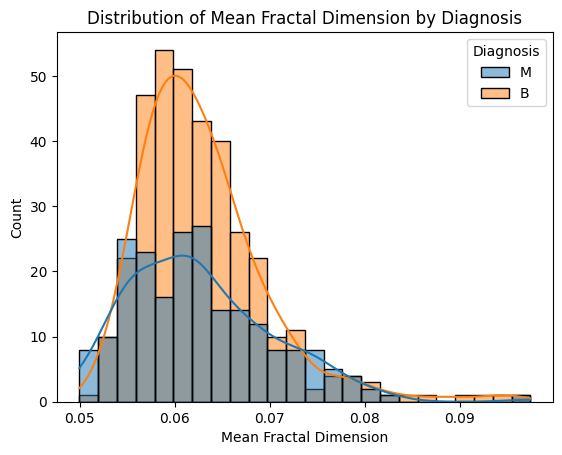

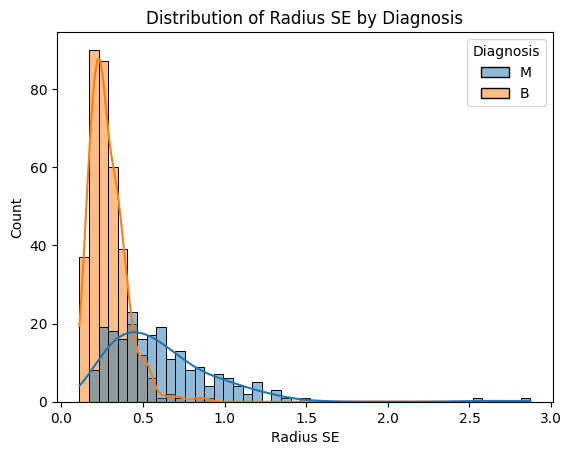

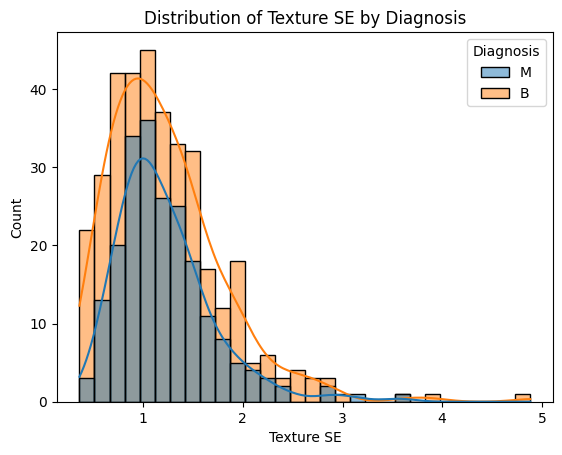

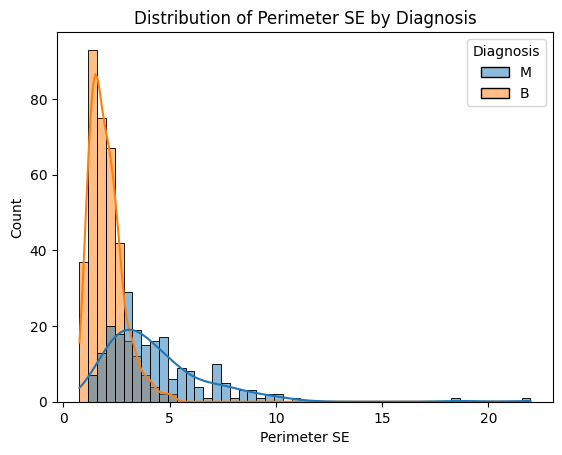

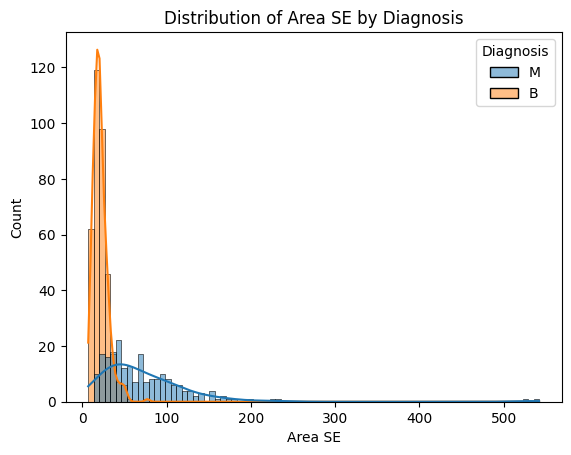

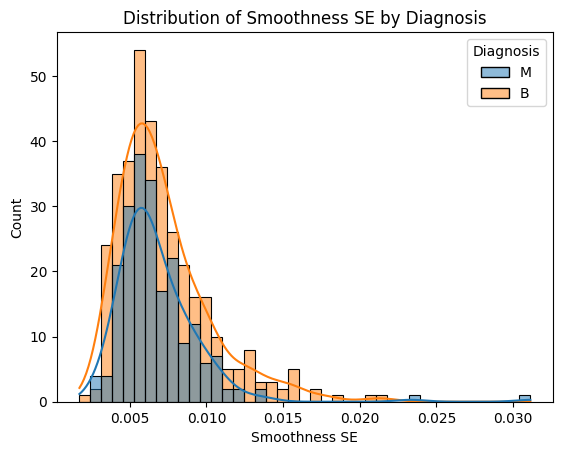

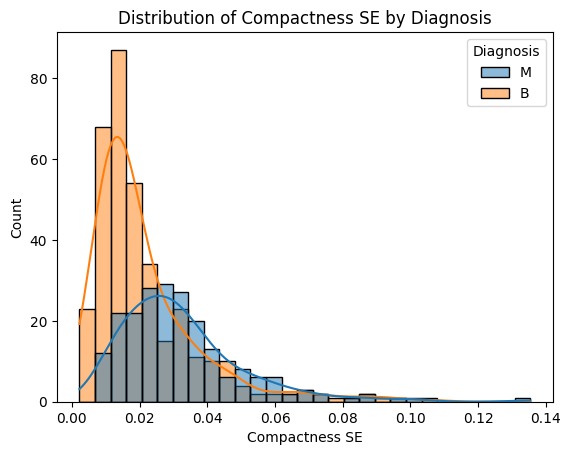

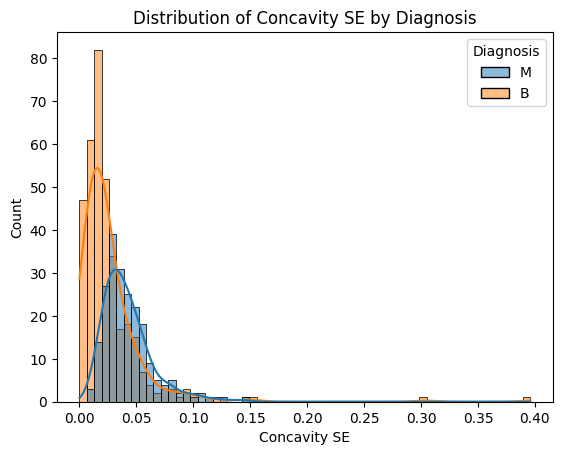

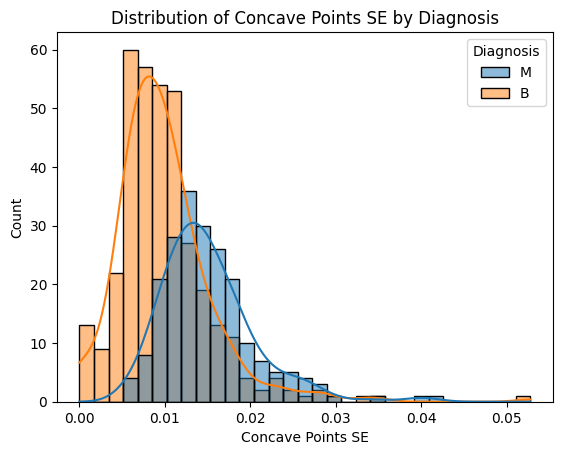

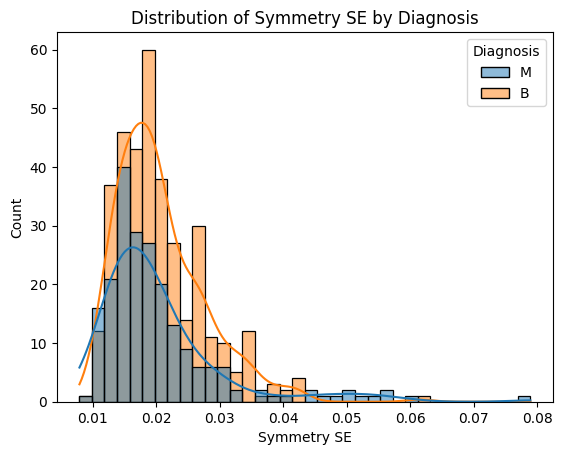

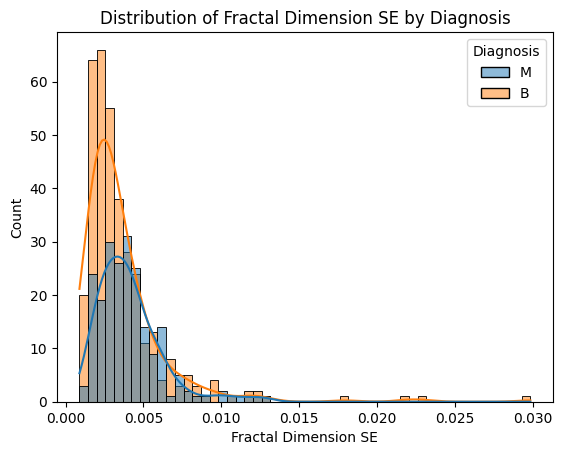

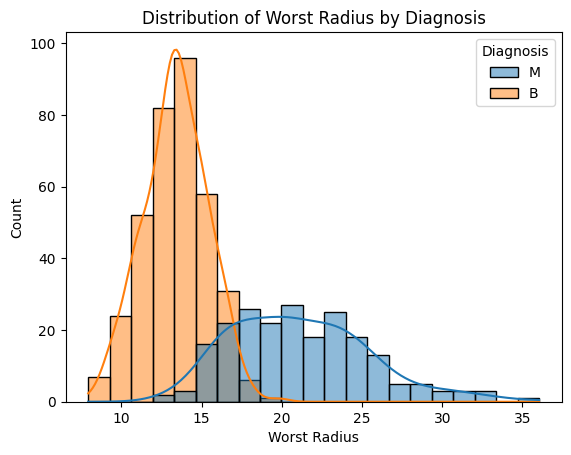

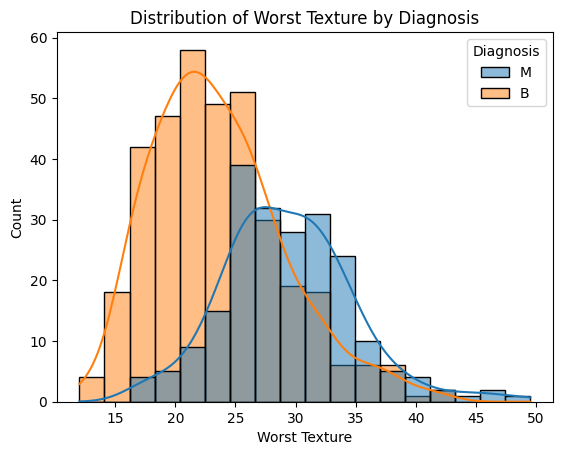

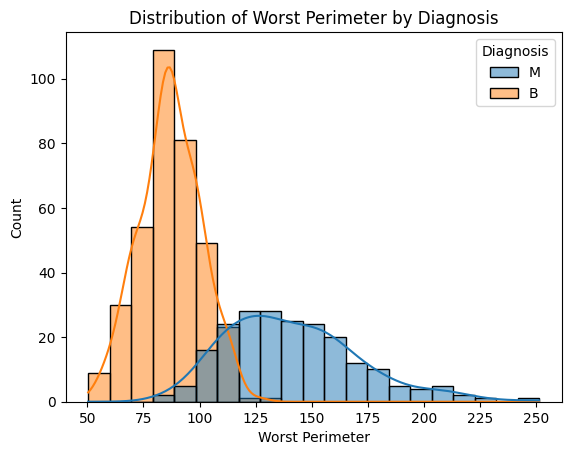

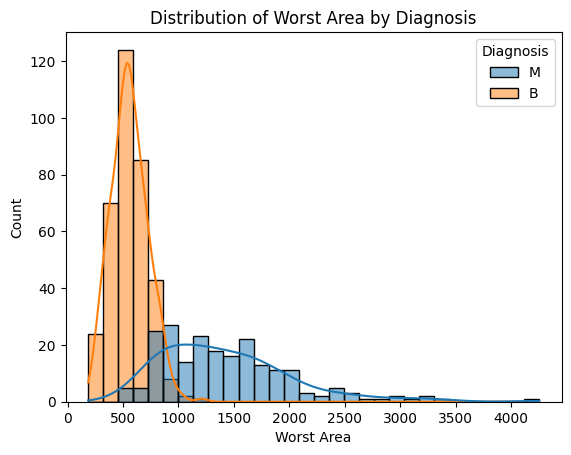

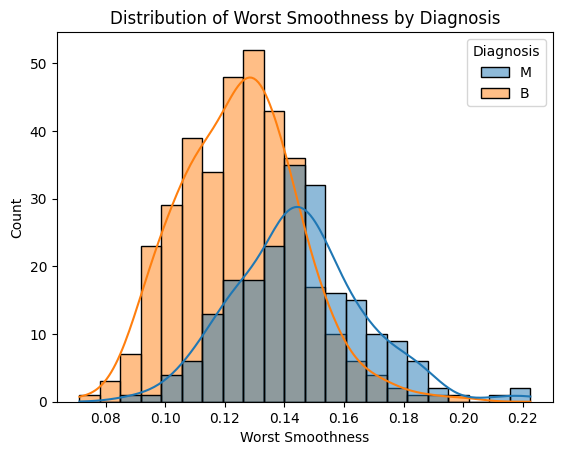

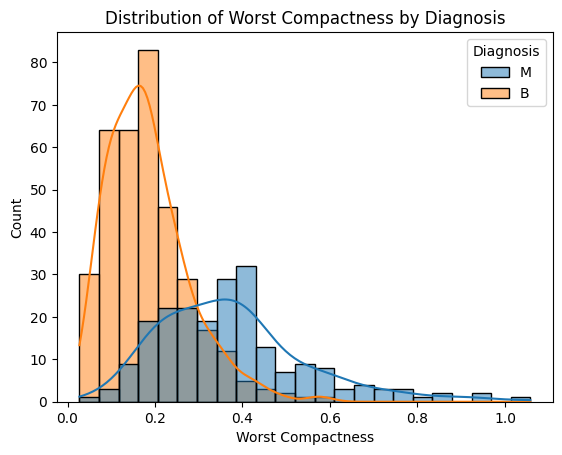

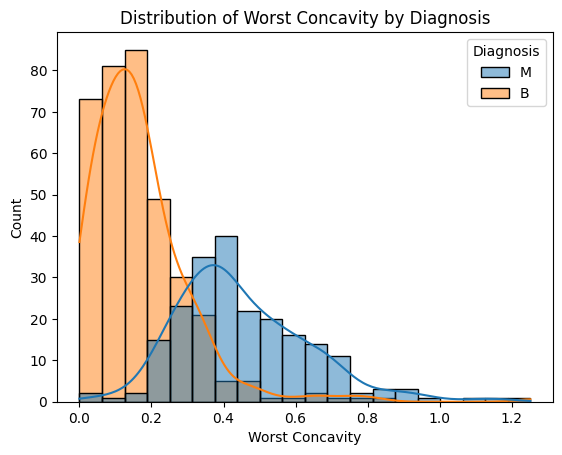

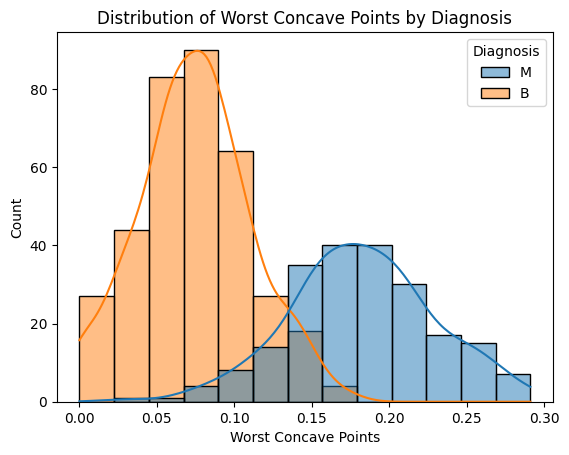

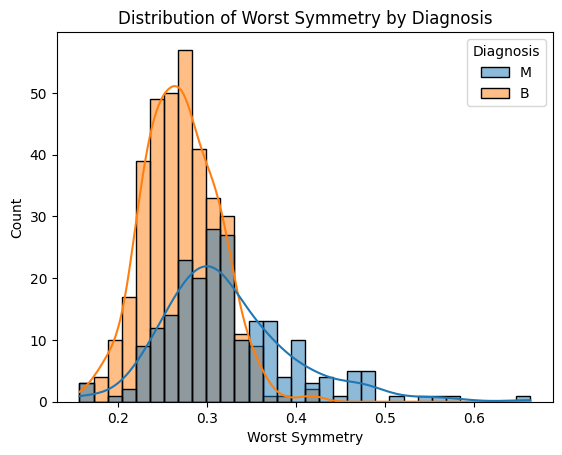

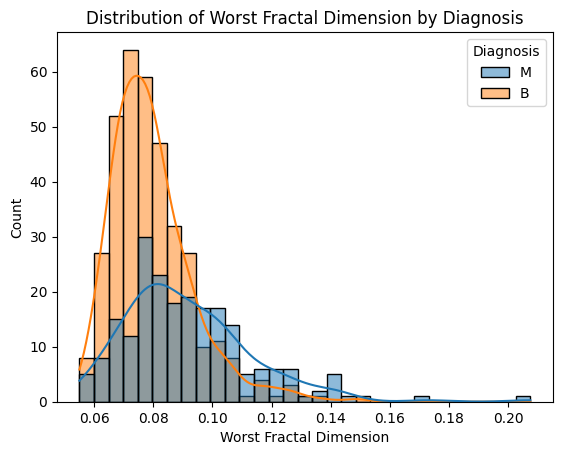

In [67]:
# Visualize the distribution of features
for feature in data.columns[2:]:
    sns.histplot(data=data, x=feature, hue='Diagnosis', kde=True)
    plt.title(f'Distribution of {feature} by Diagnosis')
    plt.show()

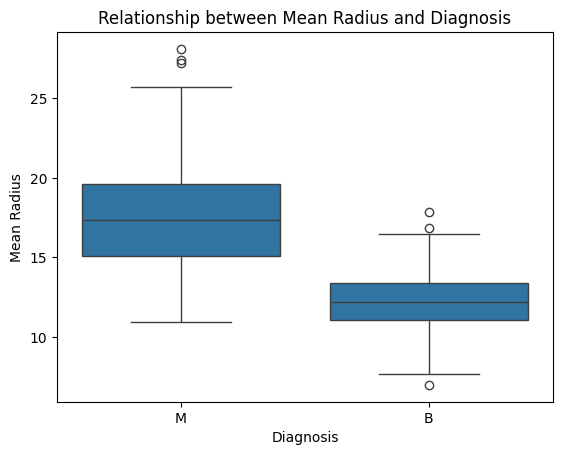

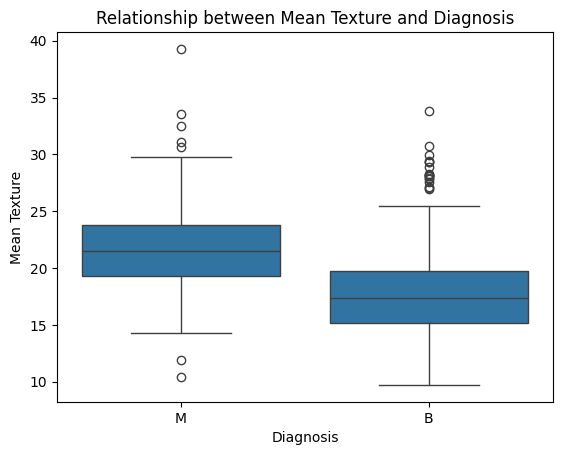

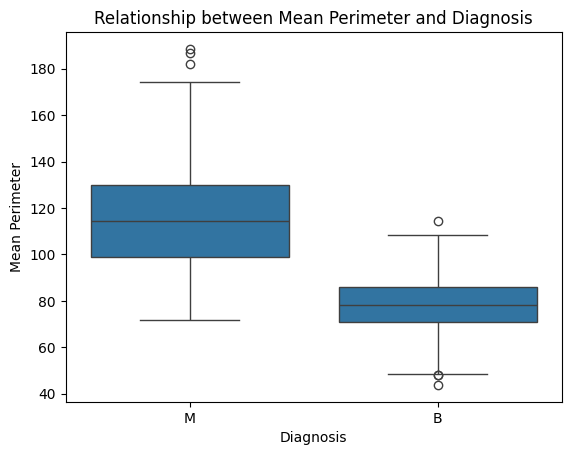

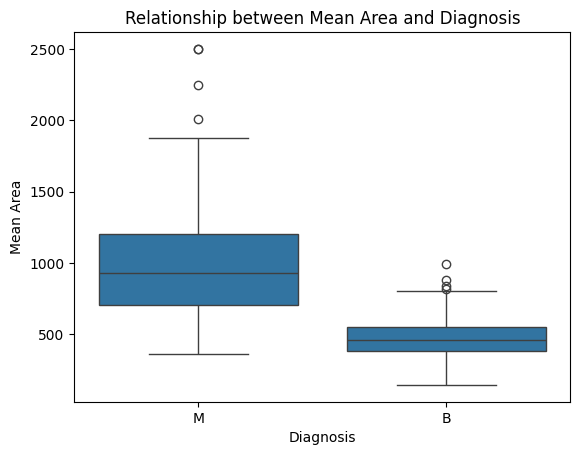

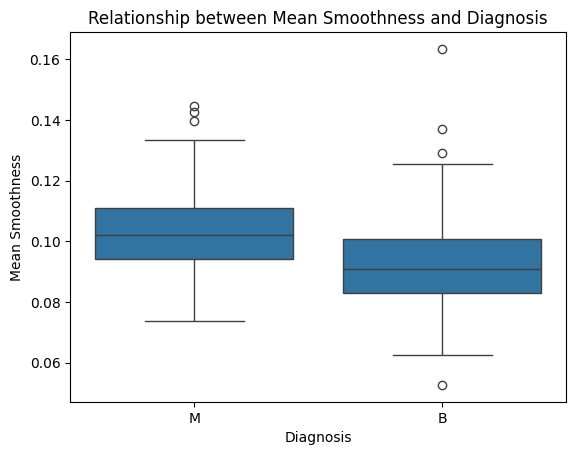

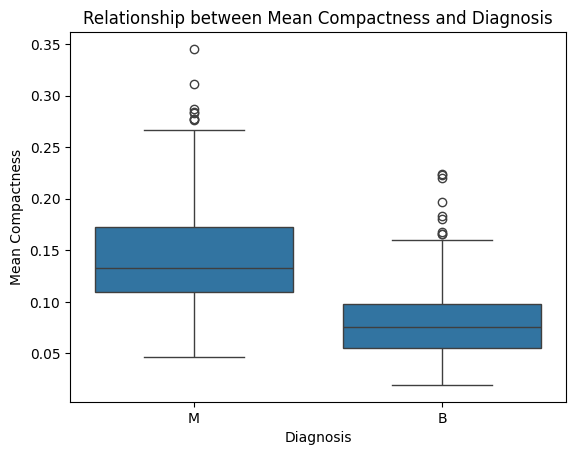

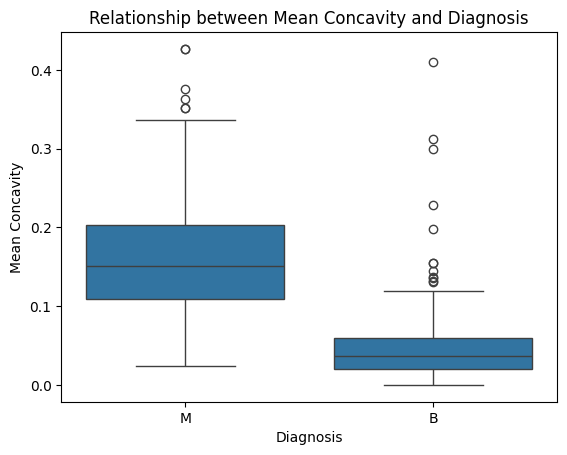

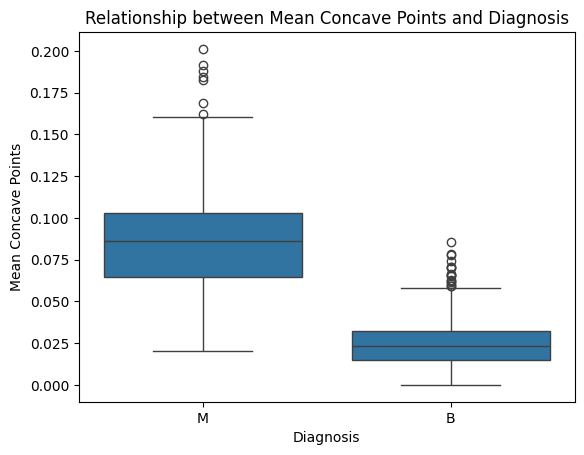

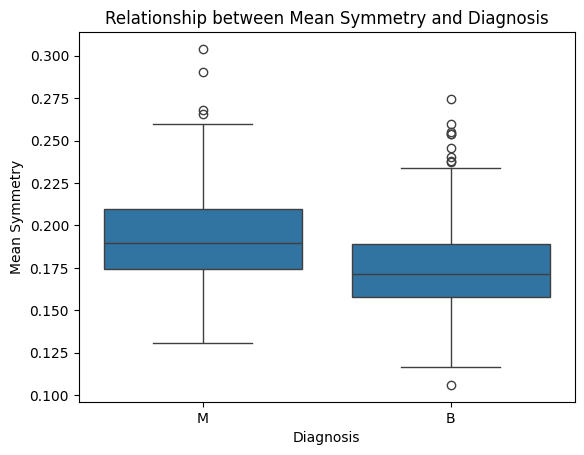

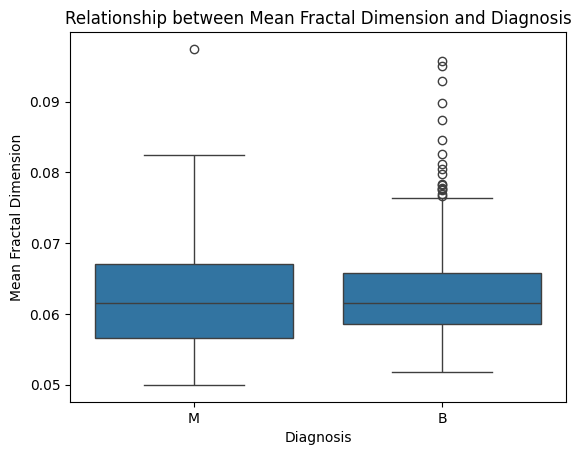

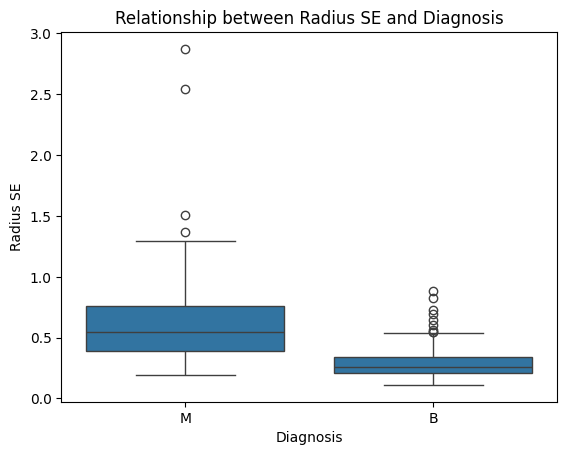

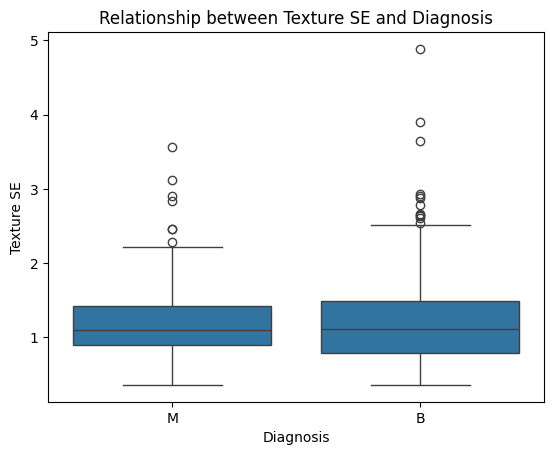

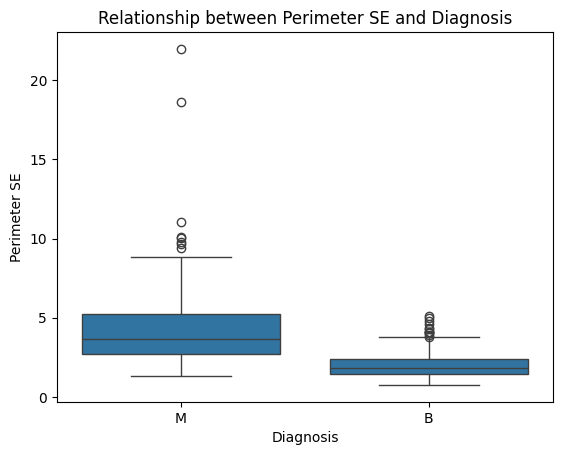

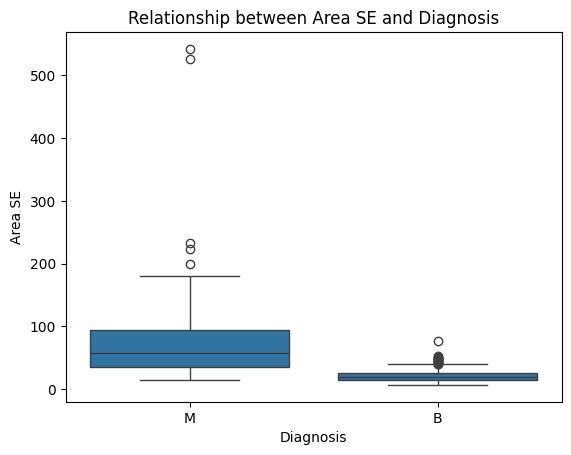

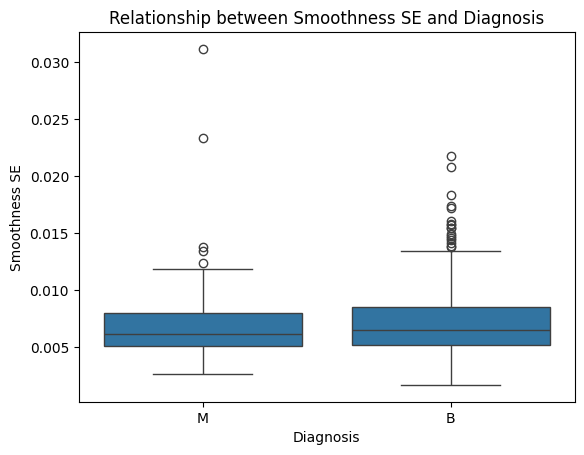

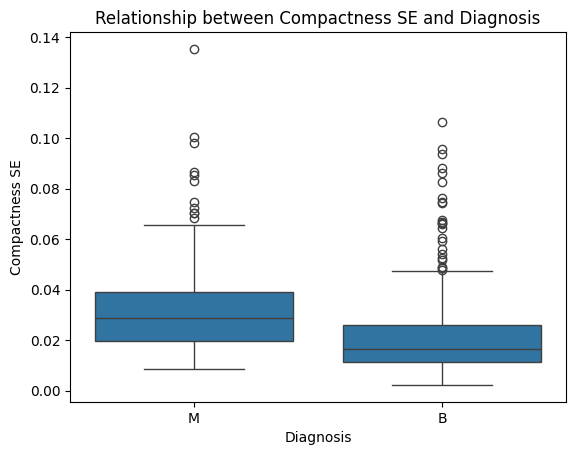

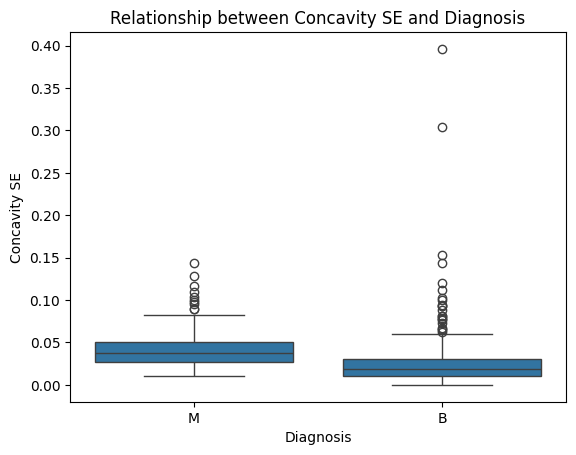

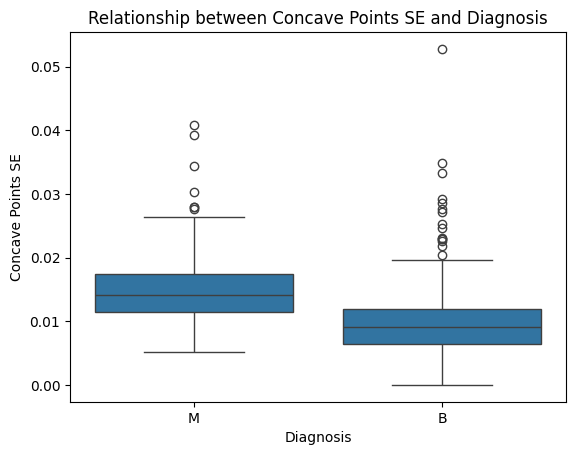

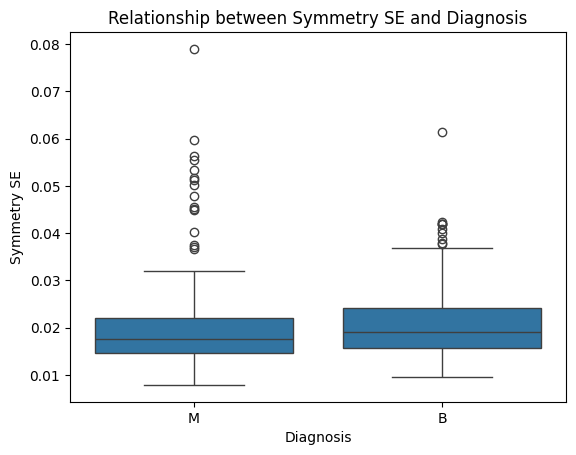

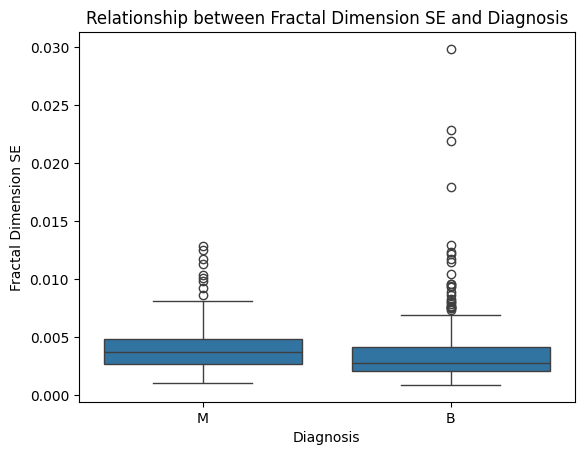

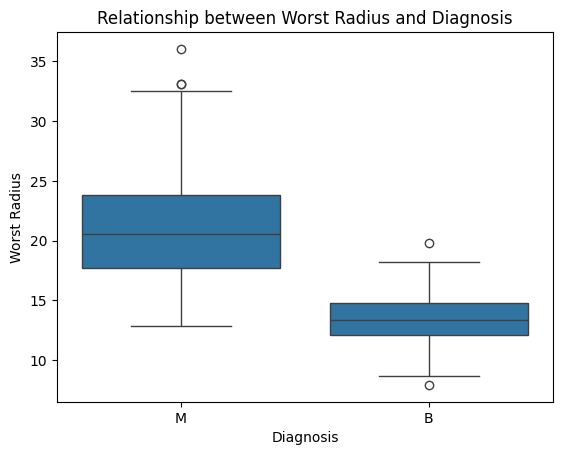

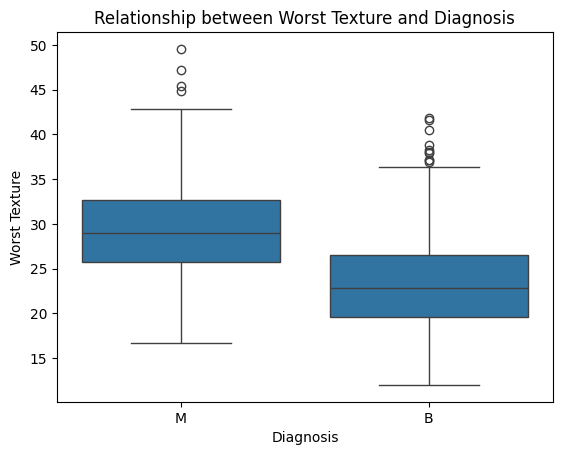

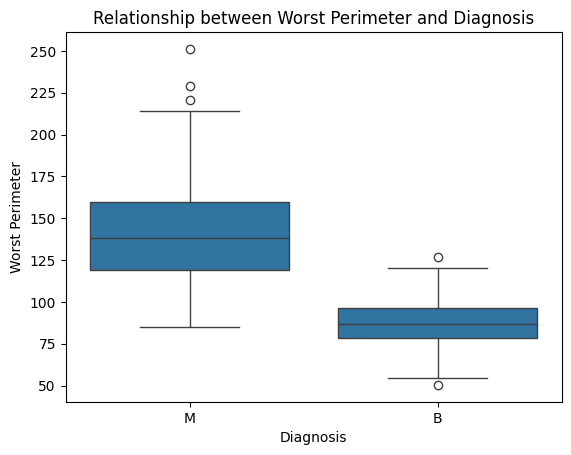

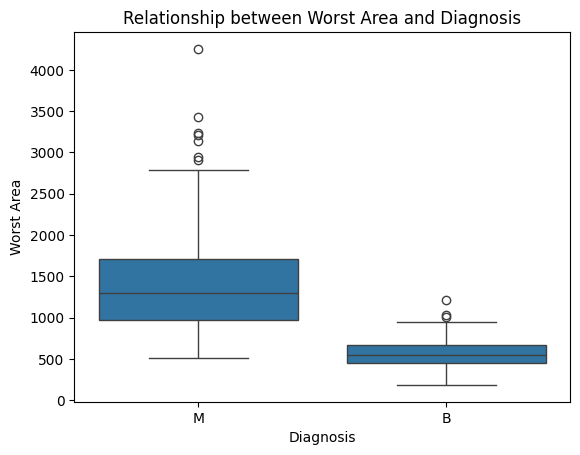

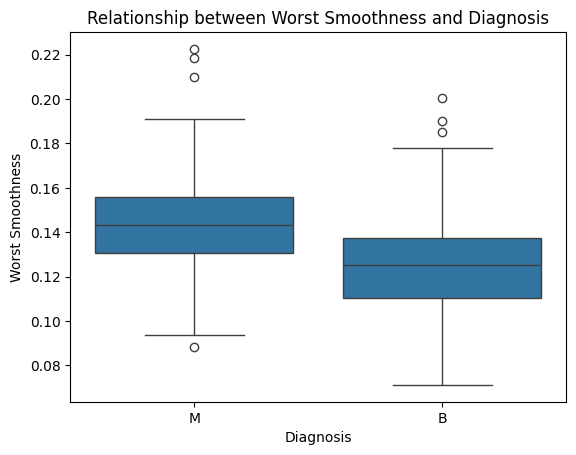

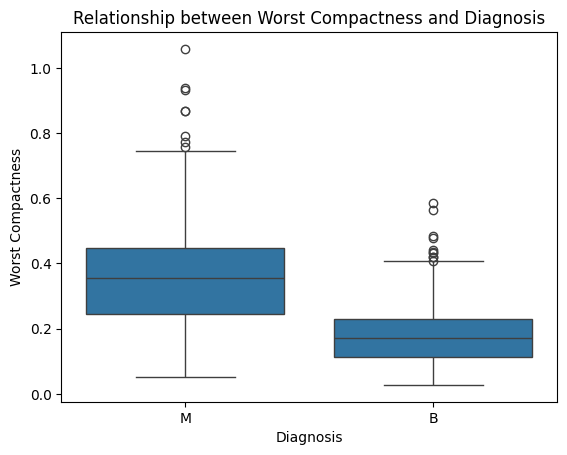

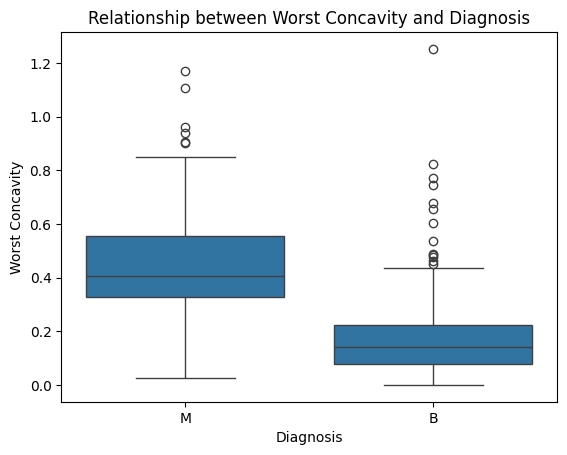

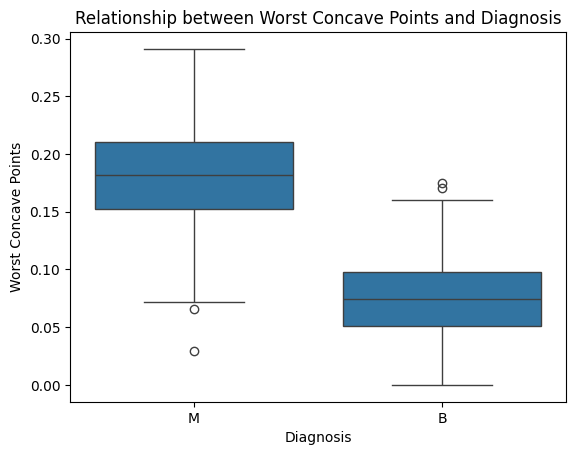

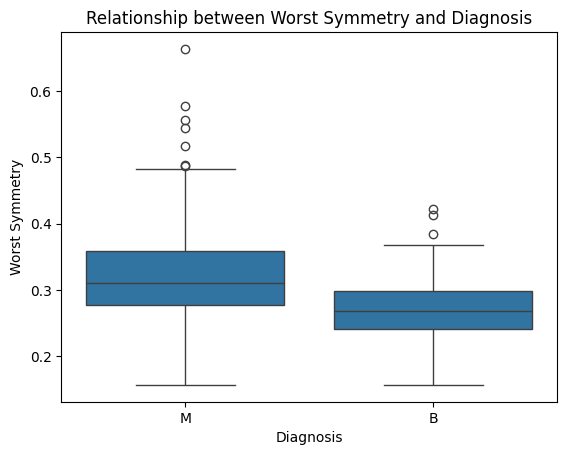

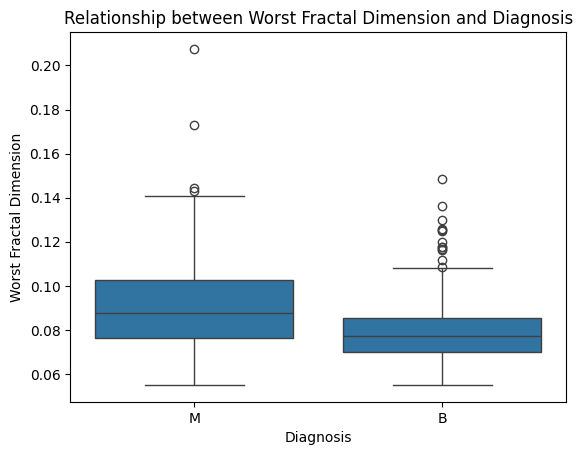

In [68]:
# Explore relationships between features and the target variable
# Box plots to visualize the relationship between each feature and the target variable
for feature in data.columns[2:]:
    sns.boxplot(x='Diagnosis', y=feature, data=data)
    plt.title(f'Relationship between {feature} and Diagnosis')
    plt.show()




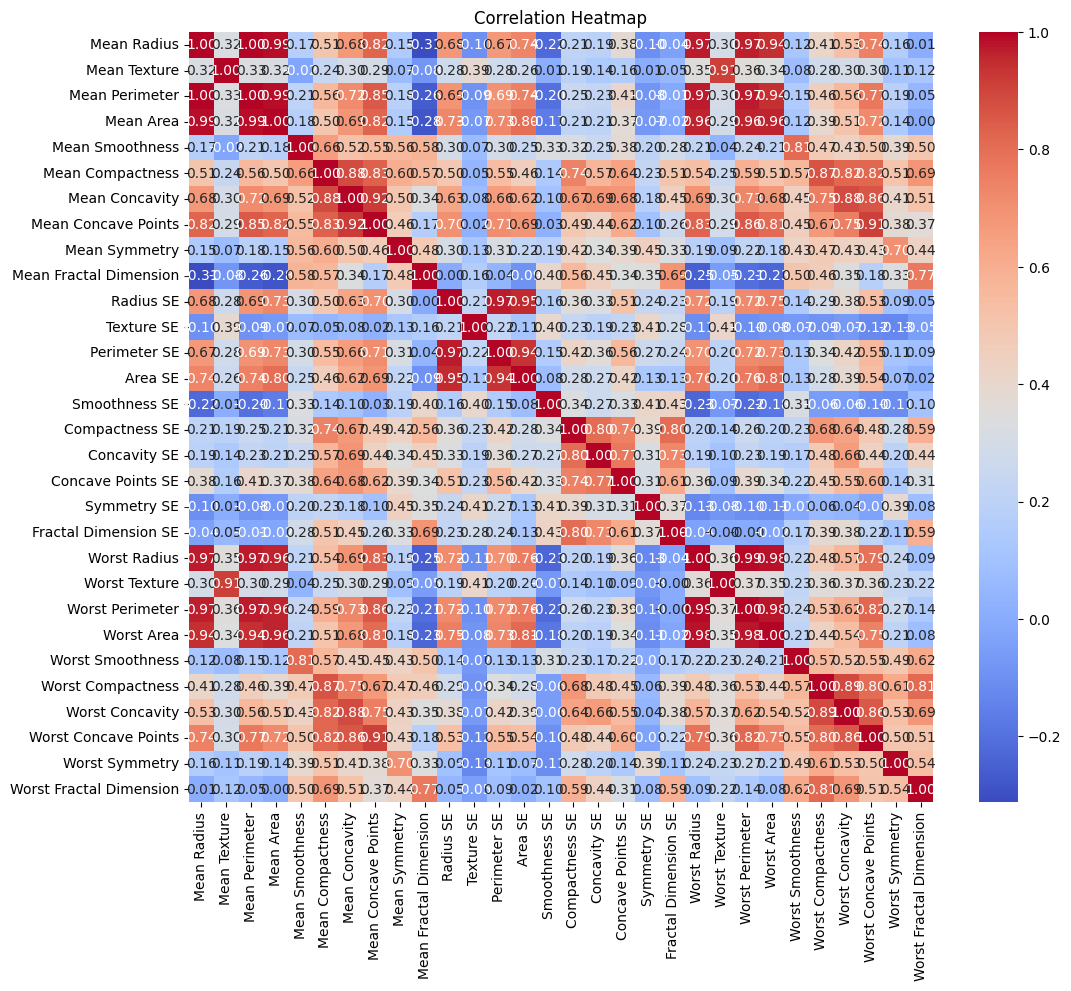

In [69]:
# Visualize correlations between features
# Calculate correlations
correlation_matrix = data.drop(['ID', 'Diagnosis'], axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title and display the plot
plt.title('Correlation Heatmap')
plt.show()


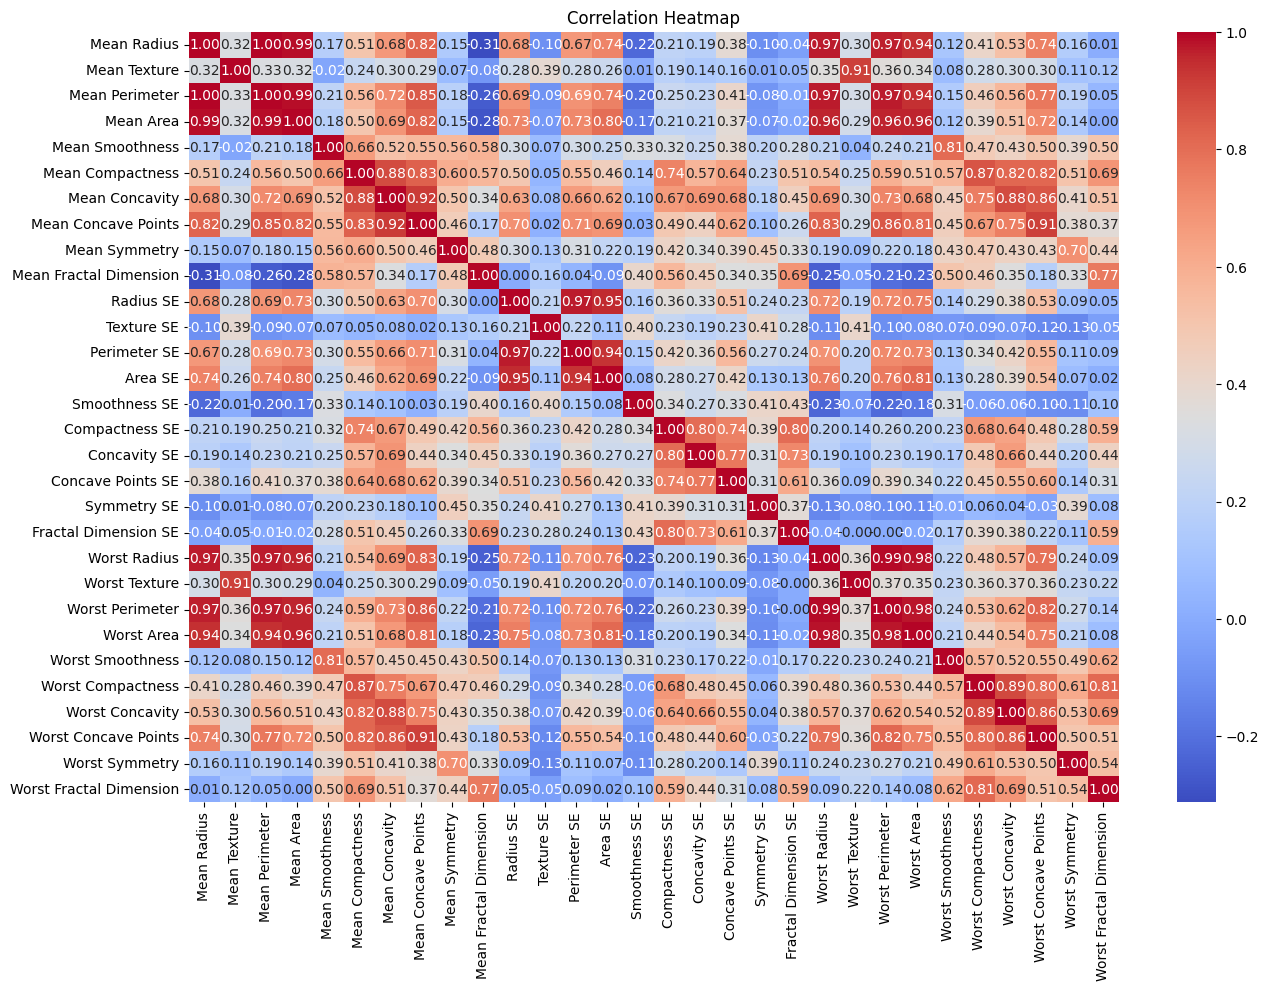

In [70]:
# Visualize correlations using heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [71]:
# Step 8: Extract insights
# Identify highly correlated features
highly_correlated = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix < 1)]
print("Highly correlated features:")
print(highly_correlated.stack().drop_duplicates())

Highly correlated features:
Mean Radius          Mean Perimeter             0.997855
                     Mean Area                  0.987357
                     Mean Concave Points        0.822529
                     Worst Radius               0.969539
                     Worst Perimeter            0.965137
                     Worst Area                 0.941082
Mean Texture         Worst Texture              0.912045
Mean Perimeter       Mean Area                  0.986507
                     Mean Concave Points        0.850977
                     Worst Radius               0.969476
                     Worst Perimeter            0.970387
                     Worst Area                 0.941550
Mean Area            Mean Concave Points        0.823269
                     Area SE                    0.800086
                     Worst Radius               0.962746
                     Worst Perimeter            0.959120
                     Worst Area                 0.959213
Mea

# Feature selection

In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target variable
X = data.drop(['ID', 'Diagnosis'], axis=1)
y = data['Diagnosis']

# Encode the target variable y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=15)  # Choose number of components
X_pca = pca.fit_transform(X_scaled)

# Feature Selection using SelectKBest with f_classif test
select_kbest = SelectKBest(score_func=f_classif, k=15)  # Choose number of top features
X_kbest = select_kbest.fit_transform(X_scaled, y_encoded)

# Get the indices of selected features
selected_indices = select_kbest.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the selected features
print("Top 15 Selected Features:")
print(selected_features)


Top 15 Selected Features:
Index(['Mean Radius', 'Mean Perimeter', 'Mean Area', 'Mean Compactness',
       'Mean Concavity', 'Mean Concave Points', 'Radius SE', 'Perimeter SE',
       'Area SE', 'Worst Radius', 'Worst Perimeter', 'Worst Area',
       'Worst Compactness', 'Worst Concavity', 'Worst Concave Points'],
      dtype='object')


# Data Accuracy Test

In [85]:
# APPly 5 algo in whole datset
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Define the classifiers
classifiers = {
    "XGBoost": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluate each classifier using cross-validation and print the accuracy
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, y_encoded, cv=5)
    print(f"{clf_name}: Accuracy = {scores.mean():.4f}")


XGBoost: Accuracy = 0.9701
Decision Tree: Accuracy = 0.9226
Random Forest: Accuracy = 0.9649
Support Vector Machine: Accuracy = 0.9736
K-Nearest Neighbors: Accuracy = 0.9649


# Train Test Validation Split

In [86]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y_encoded, test_size=0.2, random_state=42)

# Further split the training set into training and evaluation sets (80% train, 20% evaluation)
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Evaluation set shape:", X_eval.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (364, 15)
Evaluation set shape: (91, 15)
Testing set shape: (114, 15)


# Model

In [87]:
classifiers = {
    "XGBoost": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [88]:
# Define parameter grids for GridSearchCV
param_grids = {
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 6, 9]
    },
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "gamma": [0.01, 0.1, 1],
        "kernel": ["linear", "rbf"]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    }
}

In [89]:
# Fine-tuning Hyperparameters
grid_searches = {}
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ("classifier", clf)
    ])
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    grid_searches[name] = grid_search

ValueError: Invalid parameter 'max_depth' for estimator Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))]). Valid parameters are: ['memory', 'steps', 'verbose'].